In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
train_df = pd.read_csv(r"mitbih_train.csv", header=None)
test_df = pd.read_csv(r"mitbih_test.csv", header=None)

In [3]:
df =pd.concat([train_df, test_df], ignore_index=True)

In [4]:
df.shape

(109446, 188)

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(109446, 188)

In [7]:
df[187] = df[187].apply(lambda x: 0 if x == 0 else 1)


In [8]:
df[187].value_counts()

187
0    90589
1    18857
Name: count, dtype: int64

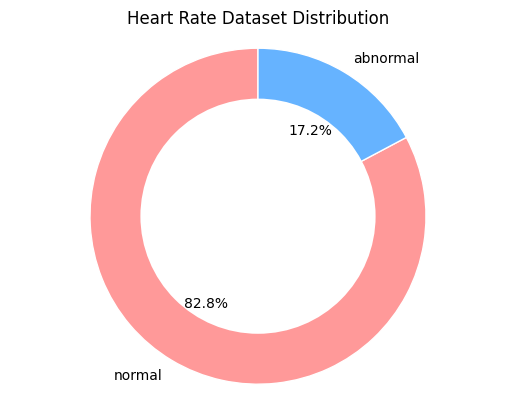

In [9]:
import matplotlib.pyplot as plt

# Data
labels = ['normal','abnormal']
sizes = [90589,18857]

# Colors for the segments
colors = ['#ff9999','#66b3ff']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Heart Rate Dataset Distribution')

# Show the plot
plt.show()


In [10]:
X = df.drop(columns=187)
y = df[187]

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# evaluation with simple FNN

In [23]:
model = Sequential()
model.add(Dense(128, input_dim=187, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


In [24]:
history = model.fit(X_train, y_train, epochs=400, batch_size=700, validation_data=(X_test, y_test))


Epoch 1/400
110/110 [==============================] - 2s 8ms/step - loss: 0.3289 - accuracy: 0.8839 - precision: 0.8280 - recall: 0.4155 - val_loss: 0.2018 - val_accuracy: 0.9330 - val_precision: 0.9439 - val_recall: 0.6454
Epoch 2/400
110/110 [==============================] - 0s 4ms/step - loss: 0.1690 - accuracy: 0.9447 - precision: 0.9343 - recall: 0.7320 - val_loss: 0.1468 - val_accuracy: 0.9538 - val_precision: 0.9605 - val_recall: 0.7606
Epoch 3/400
110/110 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.9568 - precision: 0.9445 - recall: 0.7973 - val_loss: 0.1241 - val_accuracy: 0.9597 - val_precision: 0.9545 - val_recall: 0.8018
Epoch 4/400
110/110 [==============================] - 1s 4ms/step - loss: 0.1187 - accuracy: 0.9625 - precision: 0.9510 - recall: 0.8257 - val_loss: 0.1156 - val_accuracy: 0.9635 - val_precision: 0.9561 - val_recall: 0.8236
Epoch 5/400
110/110 [==============================] - 1s 6ms/step - loss: 0.1060 - accuracy: 0.9671

In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------')
print(classification_report(y_test, y_pred))


1027/1027 [==============================] - 1s 1ms/step
[[27011   222]
 [  338  5263]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27233
           1       0.96      0.94      0.95      5601

    accuracy                           0.98     32834
   macro avg       0.97      0.97      0.97     32834
weighted avg       0.98      0.98      0.98     32834



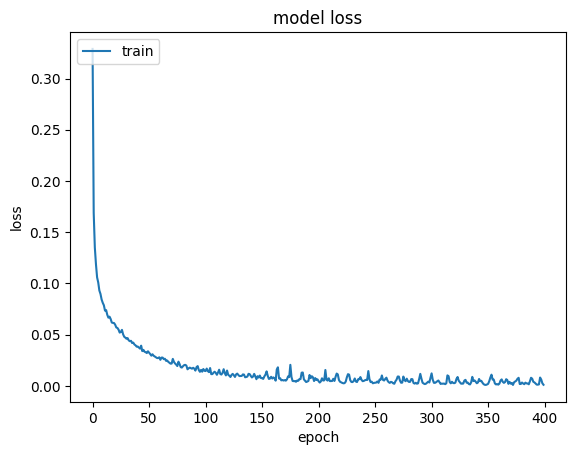

In [26]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

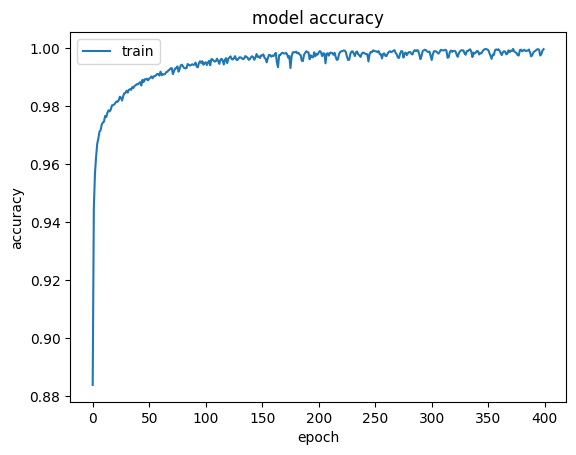

In [27]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Random Forest

In [20]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     27233
           1       0.99      0.88      0.93      5601

    accuracy                           0.98     32834
   macro avg       0.98      0.94      0.96     32834
weighted avg       0.98      0.98      0.98     32834

Confusion Matrix:
 [[27174    59]
 [  683  4918]]


# Model after Data augmentation

In [28]:
from sklearn.utils import resample
df_1=df[df[187]==1].sample(n=30000,random_state=42,replace=True)
df_0=(df[df[187]==0]).sample(n=60000,random_state=42)



df1=pd.concat([df_0,df_1])

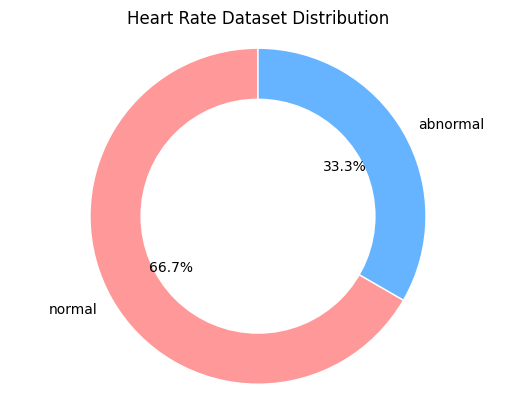

In [29]:
import matplotlib.pyplot as plt

# Data
labels = ['normal','abnormal']
sizes = [60000,30000]

# Colors for the segments
colors = ['#ff9999','#66b3ff']

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut shape
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Heart Rate Dataset Distribution')

# Show the plot
plt.show()


In [30]:
X1 = df1.drop(columns=187)
y1 = df1[187]
X_train1, X_test, y_train1, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [31]:
model = Sequential()
model.add(Dense(187, input_dim=187, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


In [34]:
history = model.fit(X_train1, y_train1, epochs=400, batch_size=600, validation_data=(X_test, y_test))


Epoch 1/400
105/105 [==============================] - 1s 7ms/step - loss: 0.0091 - accuracy: 0.9970 - precision: 0.9960 - recall: 0.9949 - val_loss: 0.0988 - val_accuracy: 0.9830 - val_precision: 0.9698 - val_recall: 0.9794
Epoch 2/400
105/105 [==============================] - 1s 5ms/step - loss: 0.0118 - accuracy: 0.9958 - precision: 0.9947 - recall: 0.9928 - val_loss: 0.1204 - val_accuracy: 0.9790 - val_precision: 0.9566 - val_recall: 0.9815
Epoch 3/400
105/105 [==============================] - 1s 5ms/step - loss: 0.0123 - accuracy: 0.9957 - precision: 0.9942 - recall: 0.9928 - val_loss: 0.0954 - val_accuracy: 0.9836 - val_precision: 0.9730 - val_recall: 0.9776
Epoch 4/400
105/105 [==============================] - 0s 5ms/step - loss: 0.0085 - accuracy: 0.9971 - precision: 0.9960 - recall: 0.9952 - val_loss: 0.0972 - val_accuracy: 0.9830 - val_precision: 0.9782 - val_recall: 0.9705
Epoch 5/400
105/105 [==============================] - 1s 5ms/step - loss: 0.0094 - accuracy: 0.9966

In [35]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(confusion_matrix(y_test, y_pred))
print('-------------------------------------------------')
print(classification_report(y_test, y_pred))


844/844 [==============================] - 1s 795us/step
[[17768   258]
 [  161  8813]]
-------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18026
           1       0.97      0.98      0.98      8974

    accuracy                           0.98     27000
   macro avg       0.98      0.98      0.98     27000
weighted avg       0.98      0.98      0.98     27000



In [41]:


Ran =  RandomForestClassifier(random_state=42)
Ran.fit(X_train,y_train)
y_pred1 = Ran.predict(X_test)
print(classification_report(y_test,y_pred1))
print('---------------------------------------------------------')
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5997
           1       0.99      0.96      0.97      6003

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

---------------------------------------------------------
[[5931   66]
 [ 242 5761]]
